### Описание
Для промежуточной аттестации необходимо выполнить анализ данных, применяя знания,
полученные в рамках изученных тем. Вам будет предоставлен датасет, который вы
должны будете проанализировать, построить модели и оценить их качество. Ваша задача
— продемонстрировать понимание и умение применять методы машинного обучения,
такие как регрессия, классификация, деревья решений и случайные леса.

Датасеты на выбор:Titanic (классификация, целевая переменная survived), California
Housing (регрессия, целевая переменная median_house_value), Boston Housing Dataset (
регрессия, целевая переменная MEDV), Breast Cancer Wisconsin (классификация, целевая
переменная Diagnosis)

* Задание
    1. Загрузка и предобработка данных:
        * Выберите датасет из списка
        * Выполните предварительную обработку данных: заполнение пропущенных значений, кодирование категориальных признаков, нормализацию данных (если необходимо).
    2. Анализ данных:
        * Выполните первичный анализ данных: статистические характеристики, распределение признаков, корреляционный анализ.
        * Постройте визуализации для лучшего понимания структуры данных.
    3. Построение модели линейной регрессии (для задач регрессии):
        * Постройте модель линейной регрессии для предсказания целевой переменной.
        * Оцените качество модели с использованием метрик R² и средней квадратичной ошибки (MSE).
        * Визуализируйте предсказанные значения и остатки модели.
    4. Построение модели логистической регрессии (для задач классификации):
        * Постройте модель логистической регрессии для бинарной классификации.
        * Оцените качество модели с использованием метрик точности (accuracy), полноты (recall), точности (precision) и F1-меры.
        * Постройте ROC-кривую и вычислите AUC.
    5. Построение модели дерева решений:
        * Оцените качество модели с использованием соответствующих метрик
    6. Построение модели случайного леса:
        * Оцените качество модели с использованием соответствующих метрик
    7. Сравнение моделей:
        * Сравните результаты всех построенных моделей.
        * Обсудите преимущества и недостатки каждой модели, а также их применимость к данному набору данных.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


df_titanic = sns.load_dataset('titanic')

df_titanic['age'].fillna(df_titanic['age'].median(), inplace=True)
df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0], inplace=True)

df_titanic.drop(['deck', 'embark_town', 'who', 'alive'], axis=1, inplace=True)

df_titanic = pd.get_dummies(df_titanic, columns=['sex', 'embarked', 'class'], drop_first=True)

print(df_titanic.head())

   survived  pclass   age  sibsp  parch     fare  adult_male  alone  sex_male  \
0         0       3  22.0      1      0   7.2500        True  False      True   
1         1       1  38.0      1      0  71.2833       False  False     False   
2         1       3  26.0      0      0   7.9250       False   True     False   
3         1       1  35.0      1      0  53.1000       False  False     False   
4         0       3  35.0      0      0   8.0500        True   True      True   

   embarked_Q  embarked_S  class_Second  class_Third  
0       False        True         False         True  
1       False       False         False        False  
2       False        True         False         True  
3       False        True         False        False  
4       False        True         False         True  


C:\Users\Женя\AppData\Local\Temp\ipykernel_13384\856062655.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(df_titanic['age'].median(), inplace=True)
C:\Users\Женя\AppData\Local\Temp\ipykernel_13384\856062655.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


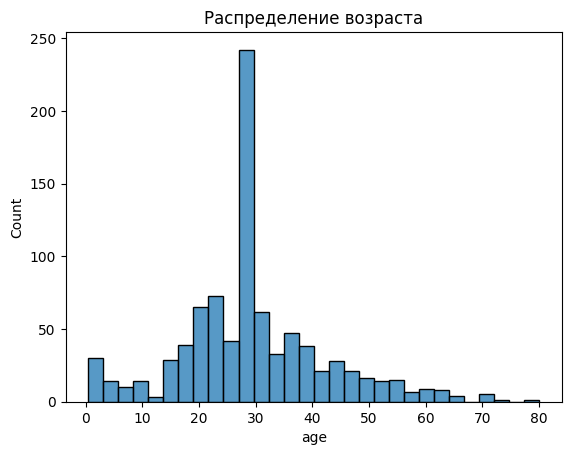

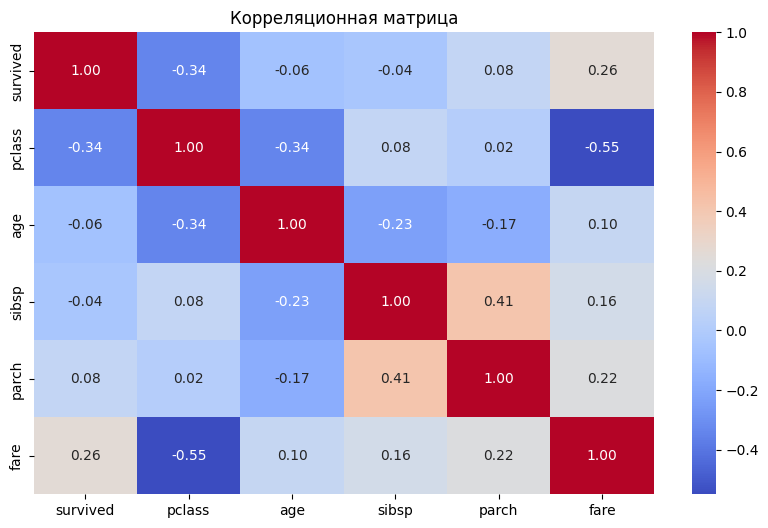

In [31]:

print(df_titanic.describe())

sns.histplot(df_titanic['age'], bins=30)
plt.title('Распределение возраста')
plt.show()

correlation = df_titanic.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Accuracy: 0.8156424581005587
Precision: 0.7971014492753623
Recall: 0.7432432432432432
F1-Score: 0.7692307692307693
ROC-AUC: 0.8801801801801802


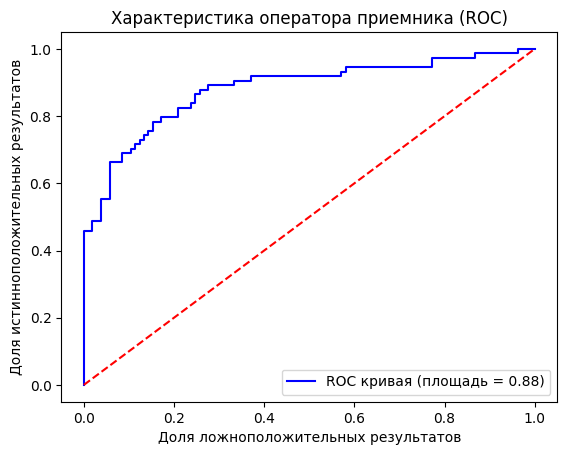

In [32]:


X = df_titanic.drop('survived', axis=1)
y = df_titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='blue', label='ROC кривая (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного угадывания
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Доля истинноположительных результатов')
plt.title('Характеристика оператора приемника (ROC)')
plt.legend(loc='lower right')
plt.show()

In [33]:


tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_tree_pred)
print("Accuracy дерева решений:", tree_accuracy)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_rf_pred)


print("Accuracy случайного леса:", rf_accuracy)
print("Точность логистической регрессии:", accuracy)
print("Точность дерева решений:", tree_accuracy)
print("Точность случайного леса:", rf_accuracy)

Accuracy дерева решений: 0.7877094972067039
Accuracy случайного леса: 0.8212290502793296
Точность логистической регрессии: 0.8156424581005587
Точность дерева решений: 0.7877094972067039
Точность случайного леса: 0.8212290502793296
